### Introduction

We will be predicting the loan status for applicants with a few different models. In particular, we will be using Logistic Regression, Decision Tree, Random Forest, and XGBoost to determine the loan status.
The training data set consists of 614 applicants with 11 different variables, including Gender, Dependents, and Education. 


### Importing the data set and libraries

In [1]:
# Import tools for data visualization and manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

# Plotting defaults
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.rcParams['patch.edgecolor'] = 'k'

# Read in the data in a dataframe
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

### Data exploration and visualization

A brief description of each variable in the dataset is provided below.

In [2]:
# VARIABLE                  DESCRIPTION
# Loan_ID                   Unique Loan ID
# Gender                    Male(1)/ Female(0)
# Married Applicant         Married (Y/N)
# Dependents                Number of dependents
# Education Applicant       Education (Graduate/ Under Graduate) 
# Self_Employed             Self employed (Y/N)
# ApplicantIncome           Applicant income
# CoapplicantIncome         Coapplicant income
# LoanAmount                Loan amount in thousands
# Loan_Amount_Term          Term of loan in months
# Credit_History            Credit history meets guidelines
# Property_Area             Urban/ Semi Urban/ Rural
# Loan_Status               Loan approved (Y/N)

#### Overview

In [3]:
# Quick summary of the data
train.info()
train.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


Note: Based on the summary of the training dataset, there are a number of fields with missing values for certain variables that will need to be addressed before we model and predict the outcomes.

In [4]:
# Summary of numerical fields
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


##### Frequency Distribution

In [5]:
# Frequency distribution of Property Area
train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [6]:
# Frequency distribution of Credit History
train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

#### Distribution Analysis

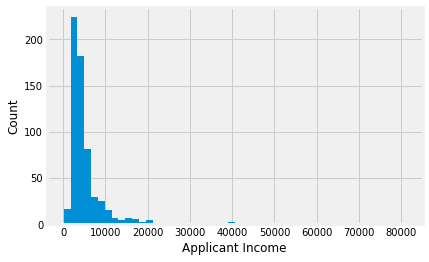

In [7]:
# Applicant income distribution analysis - Histogram
train['ApplicantIncome'].hist(bins=50)
plt.xlabel('Applicant Income'); plt.ylabel('Count'); 

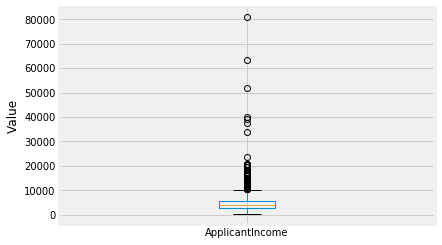

In [8]:
# Applicant income distribution analysis - Boxplot
train.boxplot(column='ApplicantIncome')
plt.ylabel('Value'); 

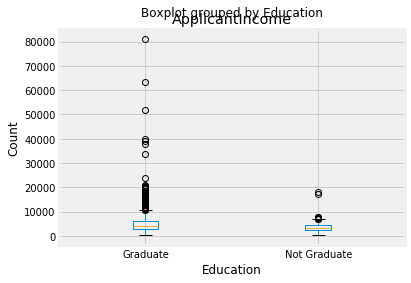

In [9]:
train.boxplot(column='ApplicantIncome', by = 'Education')
plt.ylabel('Count'); 
plt.rcParams['font.size'] = 7

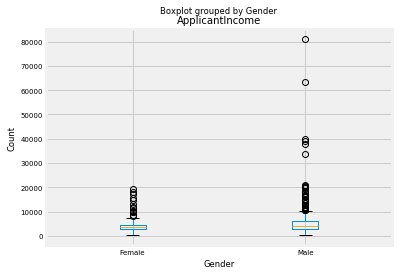

In [10]:
train.boxplot(column='ApplicantIncome', by = 'Gender')
plt.ylabel('Count'); 
plt.rcParams['font.size'] = 7

Note: Based on the summary of the training dataset, there are a number of extreme values that will need to be addressed before we model and predict the outcomes.

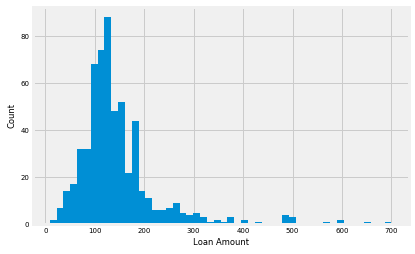

In [11]:
# Loan amount distribution analysis
train['LoanAmount'].hist(bins=50)
plt.xlabel('Loan Amount'); plt.ylabel('Count'); 

### Data scrubbing and wrangling

#### Missing Values

In [12]:
# Check for missing values in the dataset
train.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
# Check the frequency distribution for Gender variable
train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

Since there is a ~82% chance that the missing value is '1' for the Self_employed variable, we will assume that the missing 32 values are '1'.

In [14]:
# Replace the missing values for Gender with '1'
train['Gender'].fillna(1,inplace=True)

Similarly, we can replace the missing values with the mode for the other variables.

In [15]:
# Replace the missing values with the mode
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [16]:
# Fill in the missing values of Loan Amount with the mean
train['LoanAmount'].fillna(train['LoanAmount'].mean(), inplace=True)

##### Final Check

In [17]:
# Re-Check for missing values in the dataset
train.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

#### Extreme Values

Since an extreme loan can be possible due to the requirements of the applicant, we will not treat the extreme values as outliers. Instead, we can apply a log transformation to reduce the effects of the extreme values.

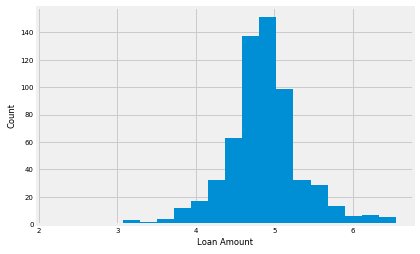

In [18]:
# Extreme values of Loan Amount
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
plt.xlabel('Loan Amount'); plt.ylabel('Count'); 

Some applicants might have extreme income values that can be justified by the income value of their co-applicant, so it makes sense to combine the ApplicantIncome and Co-applicantIncome when examining extreme values.

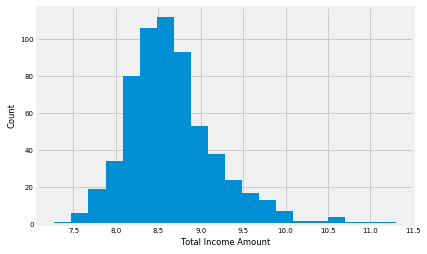

In [19]:
# Extreme values of Applicant Income
train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']
train['TotalIncome_log'] = np.log(train['TotalIncome'])
train['TotalIncome_log'].hist(bins=20) 
plt.xlabel('Total Income Amount'); plt.ylabel('Count'); 

### Building the Predictive Models

Since sklearn requires that all of the inputs to be numeric, convert all our categorical variables into numeric by encoding the categories.

In [20]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    train[i] = le.fit_transform(train[i])
train.dtypes 

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

Before applying any models to the dataset, import the required modules, and define a generic classification function that will determine the accuracy and the and cross-validation scores for all of the models.

In [21]:
# Import required models from scikit learn nd xgboost modules
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

# Generic function for making a classification model and accessing performance
def classification_model(model, data, predictors, outcome):
  # Fit the model:
  model.fit(data[predictors],data[outcome])
  
  # Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  # Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

  # Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    # Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  # Fit the model again so that it can be refered outside the function
  model.fit(data[predictors],data[outcome]) 

#### Logistic Regression

In [22]:
# Define the outcome variable
outcome_var = 'Loan_Status'

# Apply the Logistic Regression model with only the Credit History variable
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, train,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [23]:
# We can try different combination of variables
predictor_var = ['Credit_History','Education','Married','Self_Employed','Property_Area']
classification_model(model, train, predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


The Credit History variable is a relatively dominating predictor since the additional variables seem to have little effect on the scores.

#### Decision Tree

In [24]:
model = DecisionTreeClassifier()
predictor_var = ['Credit_History']
classification_model(model, train, predictor_var, outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [25]:
#We can try different combination of variables:
train.head()
predictor_var = ['Credit_History','Loan_Amount_Term','LoanAmount_log']
classification_model(model, train, predictor_var,outcome_var)

Accuracy : 89.414%
Cross-Validation Score : 68.559%


#### Random Forest

In [26]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model, train, predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 77.856%


In [27]:
# Create a series with feature importances:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print (featimp)

Credit_History      0.275116
TotalIncome_log     0.256761
LoanAmount_log      0.212248
Dependents          0.051979
Property_Area       0.047727
Self_Employed       0.040682
Loan_Amount_Term    0.037743
Gender              0.027265
Married             0.026643
Education           0.023835
dtype: float64


In [28]:
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['Credit_History', 'TotalIncome_log','LoanAmount_log', 'Dependents','Property_Area']
classification_model(model, train, predictor_var,outcome_var)

Accuracy : 82.410%
Cross-Validation Score : 81.110%


#### XGBoost

In [29]:
model = XGBClassifier()
predictor_var = ['Credit_History']
classification_model(model, train, predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [30]:
# Increase the number of predicting variables 
model = XGBClassifier()
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']
classification_model(model, train, predictor_var,outcome_var)

Accuracy : 85.668%
Cross-Validation Score : 80.295%


In [31]:
# Increase the max_depth
model = XGBClassifier(max_depth=8)
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']
classification_model(model, train, predictor_var,outcome_var)

Accuracy : 96.254%
Cross-Validation Score : 78.347%


In [32]:
# Decrease the max_depth
model = XGBClassifier(max_depth=6)
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']
classification_model(model, train, predictor_var,outcome_var)

Accuracy : 91.368%
Cross-Validation Score : 78.832%


In [33]:
# Increase lambda
model = XGBClassifier(max_depth=7, reg_lambda=0.5)
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']
classification_model(model, train, predictor_var,outcome_var)

Accuracy : 95.440%
Cross-Validation Score : 77.366%
